In [31]:
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.layers import Dense, Activation
np.random.seed(1671)

In [32]:
num_epoch = 200
batch_size = 128
verbose = 1
num_classes = 10
optimizer = SGD()
num_hidden = 128
train_portion = 0.2

In [33]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

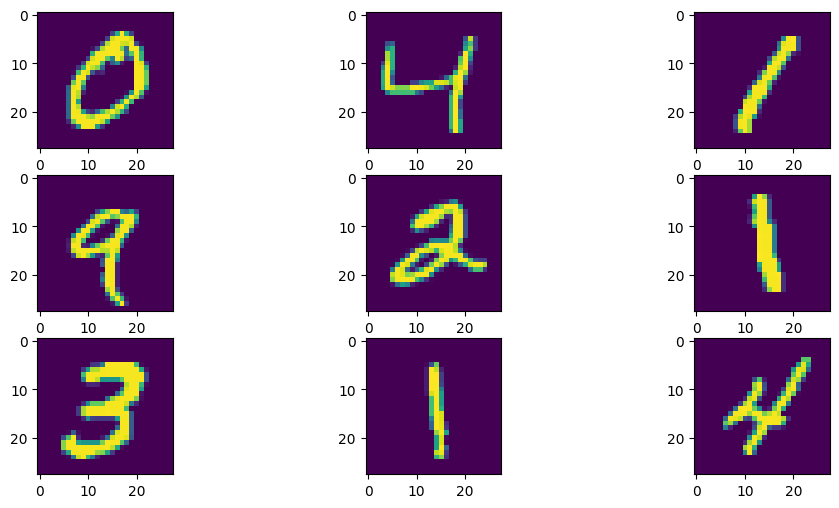

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 6))

for i in range(1, 10):
  plt.subplot(3, 3, i)
  plt.imshow(X_train[i])

#Temos que o dataset é com posto por 60000 itens 28x28 (60000 x 28 x 28). Vamos aplicar o conceito de *flattening* e torná-lo 60000 x 784

In [35]:
new_shape = 784

In [36]:
X_train = X_train.reshape(60000, new_shape)
X_test = X_test.reshape(10000, new_shape)

In [37]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalização dos valores do intervalo [ 0, 255 ] para [ 0, 1 ].

In [38]:
X_train /= 255
X_test /= 255

In [39]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


#Convertemos os valores de Y em matrizes binárias com as linhas compostas por zeros e apenas um número 1 na posição que representa o valor do número.

In [40]:
from keras.utils import to_categorical

In [41]:
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

função SoftMax:

$S(y)i = exp(yi)/∑jexp(yj)$

In [42]:
model = Sequential()
model.add(Dense(num_classes, input_shape = (new_shape,)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


$H(y,y^​)=−∑i​yi​⋅log(y^​i​)$

In [43]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

#Acessando os hiperparâmetros:

In [44]:
model_config = model.get_config()
print(model_config)

{'name': 'sequential_1', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 784), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_1_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 784), 'units': 10, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 784)}}, {'module': 'keras.layers', 'class_name': 'Activation', 'config': {'name': 'activation_1

In [45]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
history = model.fit(
                    X_train, Y_train,
                    batch_size = batch_size,
                    epochs = num_epoch,
                    verbose = verbose,
                    validation_split = train_portion,
                   )
score = model.evaluate(X_test, Y_test, verbose = verbose)

print("Test score:", score[0])
print("Test accuracy:", score[1])


Epoch 1/200
375/375 [==============================] - 2s 3ms/step - loss: 1.3582 - accuracy: 0.6793 - val_loss: 0.8821 - val_accuracy: 0.8257
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.7862 - accuracy: 0.8295 - val_loss: 0.6501 - val_accuracy: 0.8608
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.6395 - accuracy: 0.8523 - val_loss: 0.5570 - val_accuracy: 0.8730
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5683 - accuracy: 0.8621 - val_loss: 0.5052 - val_accuracy: 0.8802
Epoch 5/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.8691 - val_loss: 0.4720 - val_accuracy: 0.8834
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.8746 - val_loss: 0.4483 - val_accuracy: 0.8881
Epoch 7/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4731 - accuracy: 0.8778 - val_loss: 0.4304 - val_accuracy: 0.8905

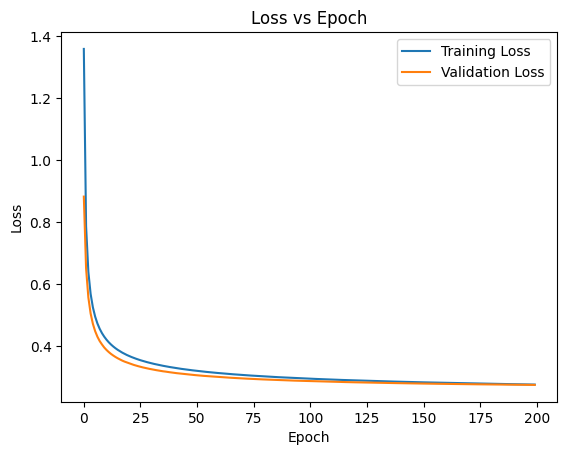

In [47]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Acuracidade:

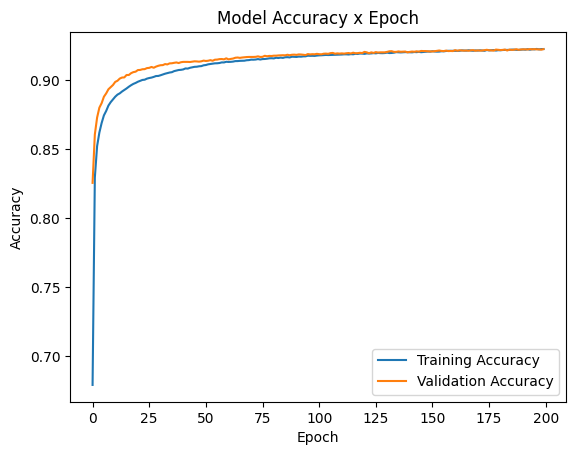

In [48]:
plt.plot(history.history['accuracy'], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Model Accuracy vs Epoch")
plt.legend()
plt.show()

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.optimizer.get_config()

{'name': 'SGD',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.01,
 'momentum': 0.0,
 'nesterov': False}